**Демо-экзамен по курсу "Машинное обучение"**

Выполнил: Гаврюсев Иван Александрович, Б22-712
Филиал: НИЯУ МИФИ

 *Вставьте ниже скриншот из личного кабинета Иннополиса с результатами прохождения итогового асессмента (https://auth.unionepro.ru/login?redirect=https%3A%2F%2Fassessment.unionepro.ru%2F)*

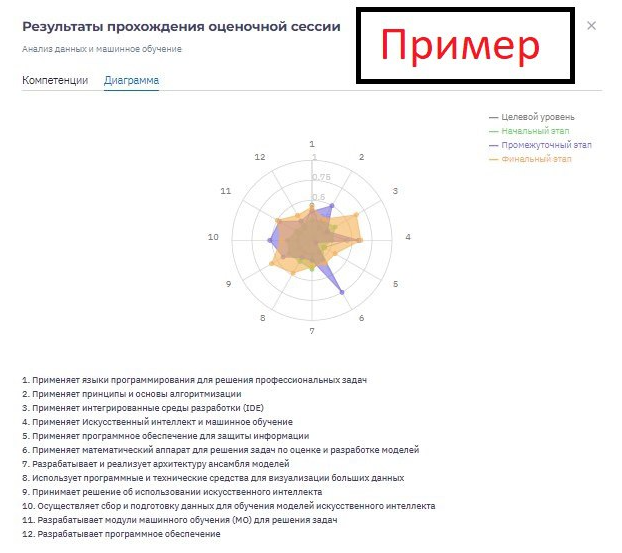

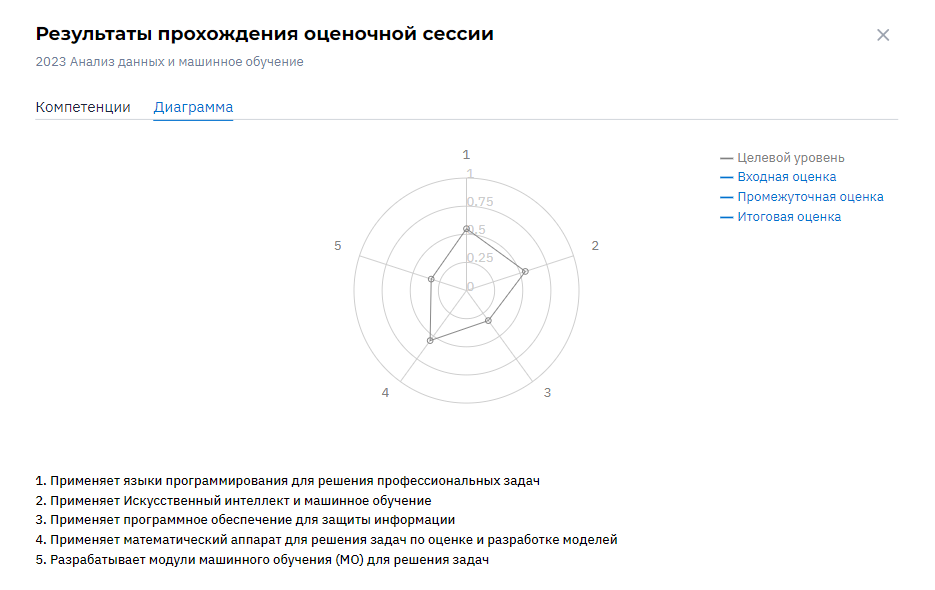

---
# 1. Исходные данные

### 1.1 Загрузка библиотек и данных


*Загрузить данные в соответствии с вариантом задания*

In [1]:
# Load data

from sklearn.datasets import load_digits
data = load_digits()


In [2]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#преобразуем данные в DataFrame
df = pd.DataFrame(data.data, columns=[f'pixel_{i}' for i in range(data.data.shape[1])])
df['target'] = data.target

df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [3]:
# Проверим, что столбец 'target' существует в DataFrame
if 'target' in df.columns:
    print("Столбец 'target' успешно добавлен.")
else:
    print("Столбец 'target' отсутствует.")

Столбец 'target' успешно добавлен.


(1797, 64)


<Figure size 640x480 with 0 Axes>

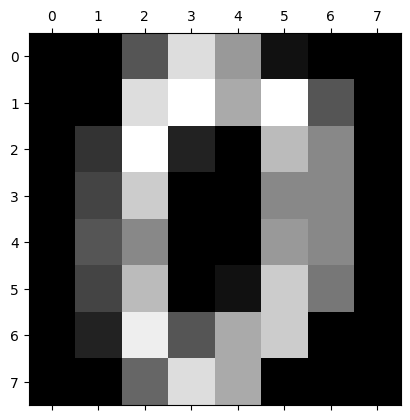

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
import matplotlib.pyplot as plt
plt.gray()
plt.matshow(digits.images[0])
plt.show()
print(digits.DESCR)
print(f"Количество образцов: {digits.data.shape[0]}")
print(f"Количество признаков: {digits.data.shape[1]}")

### 1.2 Описание исходных данных


*Привести описание исходных данных, описание и типы признаков (вещественные, целочисленные, категориальные и т.д.), объём выборки, особенности данных. Сформулировать решаемую задачу, определить тип задачи (регрессия / классификация), указать входные и выходные переменные.*

Количество образцов: 1797 Количество признаков: 64 Каждый пиксель представлен целочисленным значением от 0 до 16. Это задача классификации, где входные переменные значения пикселей изображений(64 пикселя) , а выходными переменными являются метки классов ( от 0 до 9)

### 1.3 Выборочные характеристики

*Рассчитать основные выборочные характеристики (среднее, дисперсию, среднеквадратическое отклонение, медиану и т.д.), привести объемы выборок в каждом классе (для задач классификации)*

In [5]:
#основные статистические характеристики
desc = df.describe()
print(desc)

#объем выборок в каждом классе
class_distribution = df['target'].value_counts()
print(f"Классы:\n{class_distribution}")

       pixel_0      pixel_1      pixel_2      pixel_3      pixel_4  \
count   1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean       0.0     0.303840     5.204786    11.835838    11.848080   
std        0.0     0.907192     4.754826     4.248842     4.287388   
min        0.0     0.000000     0.000000     0.000000     0.000000   
25%        0.0     0.000000     1.000000    10.000000    10.000000   
50%        0.0     0.000000     4.000000    13.000000    13.000000   
75%        0.0     0.000000     9.000000    15.000000    15.000000   
max        0.0     8.000000    16.000000    16.000000    16.000000   

           pixel_5      pixel_6      pixel_7      pixel_8      pixel_9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       0.000000     0.000000     0.000000     0.00

### 1.4 Исследование распределений признаков и откликов


*Построить гистограммы распределения и диаграммы Box-and-Whisker (для отдельных признаков при большом их числе), сделать выводы о характере распределений признаков (для задач классификации - в классах), наличии выбросов и т.п.*

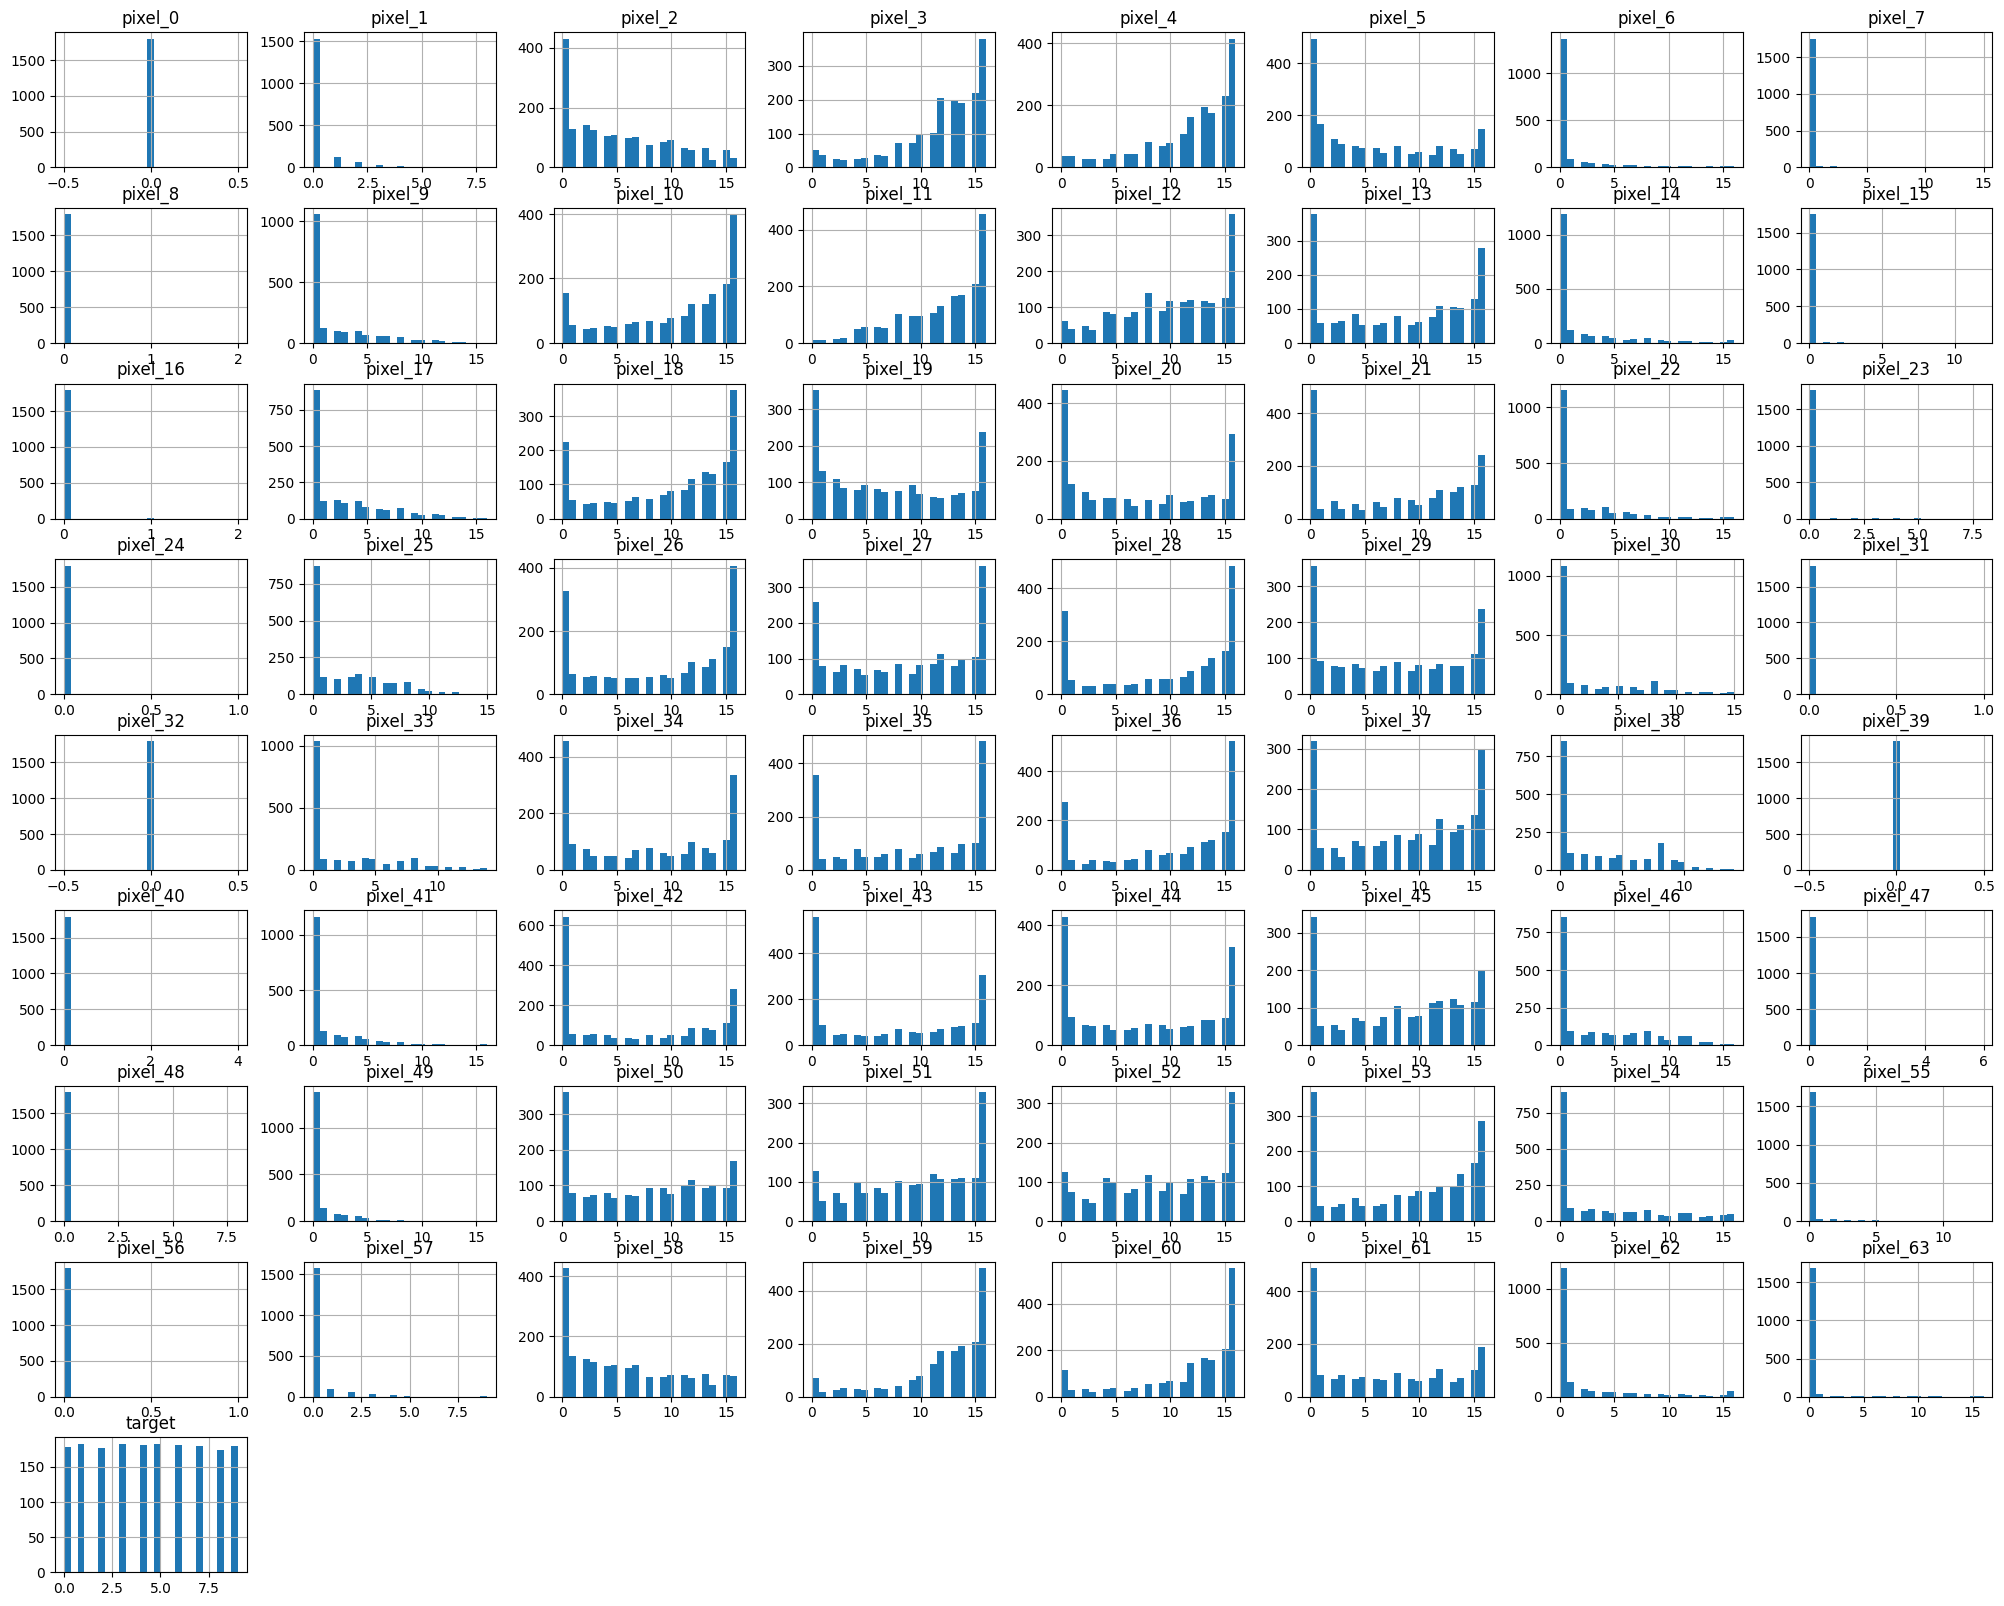

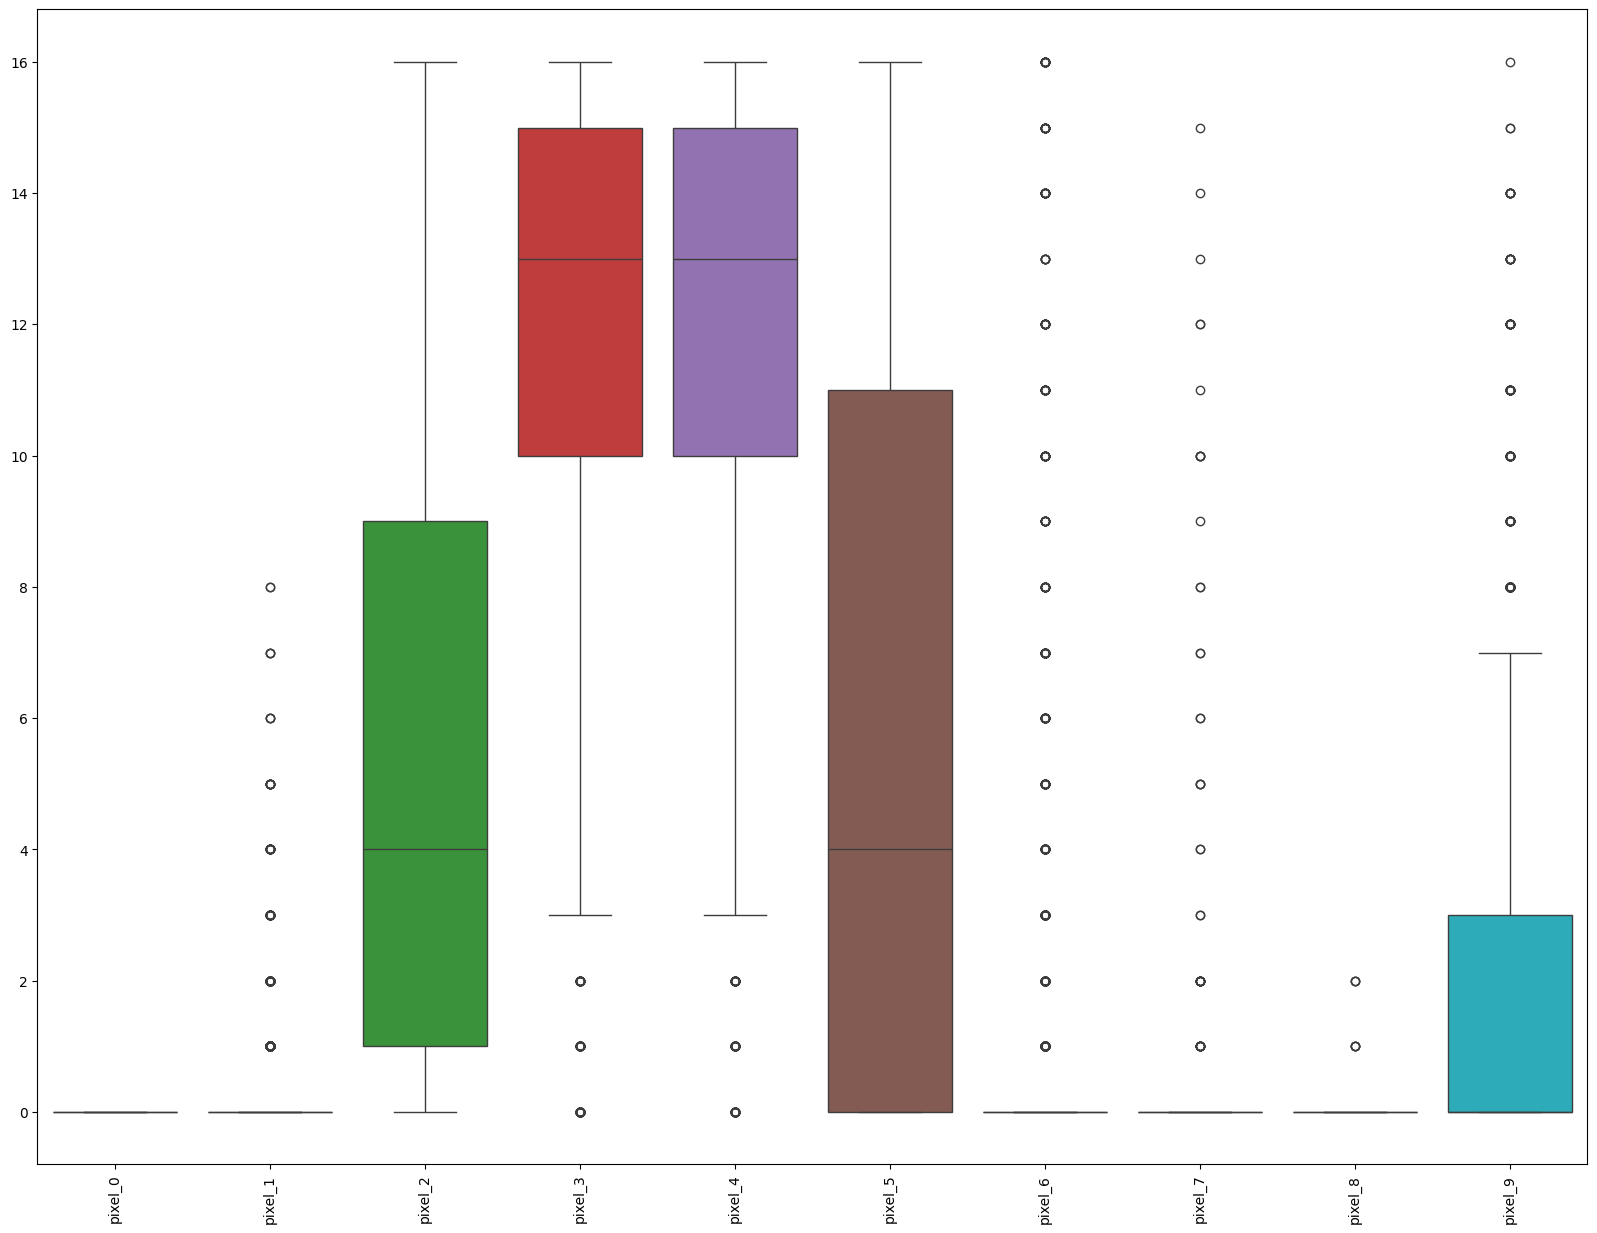

In [6]:
#Гистограммы для нескольких признаков
df.hist(bins=25, figsize=(25,20))
plt.show()

#Box-and-Whisker
plt.figure(figsize=(20,15))
sns.boxplot(data=df.iloc[:, :10])
plt.xticks(rotation=90)
plt.show()

In [7]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print(df.columns)

Index(['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4',
       'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1',
       'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6',
       'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3',
       'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0',
       'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
       'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2',
       'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7',
       'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4',
       'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1',
       'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6',
       'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
       'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7', 'target'],
      dtype='object')


In [8]:
print(digits.data.shape)
print(digits.target.shape)

print(df.head())
print(df['target'].head())

(1797, 64)
(1797,)
   pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0        0.0        0.0        5.0       13.0        9.0        1.0   
1        0.0        0.0        0.0       12.0       13.0        5.0   
2        0.0        0.0        0.0        4.0       15.0       12.0   
3        0.0        0.0        7.0       15.0       13.0        1.0   
4        0.0        0.0        0.0        1.0       11.0        0.0   

   pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1        0.0        0.0        0.0        0.0  ...        0.0        0.0   
2        0.0        0.0        0.0        0.0  ...        0.0        0.0   
3        0.0        0.0        0.0        8.0  ...        0.0        0.0   
4        0.0        0.0        0.0        0.0  ...        0.0        0.0   

   pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0        0.0        6.0   

### 1.5 Корреляционный анализ данных


*Визуализировать диаграммы рассеяния и корреляционную матрицу признаков, сделать выводы*

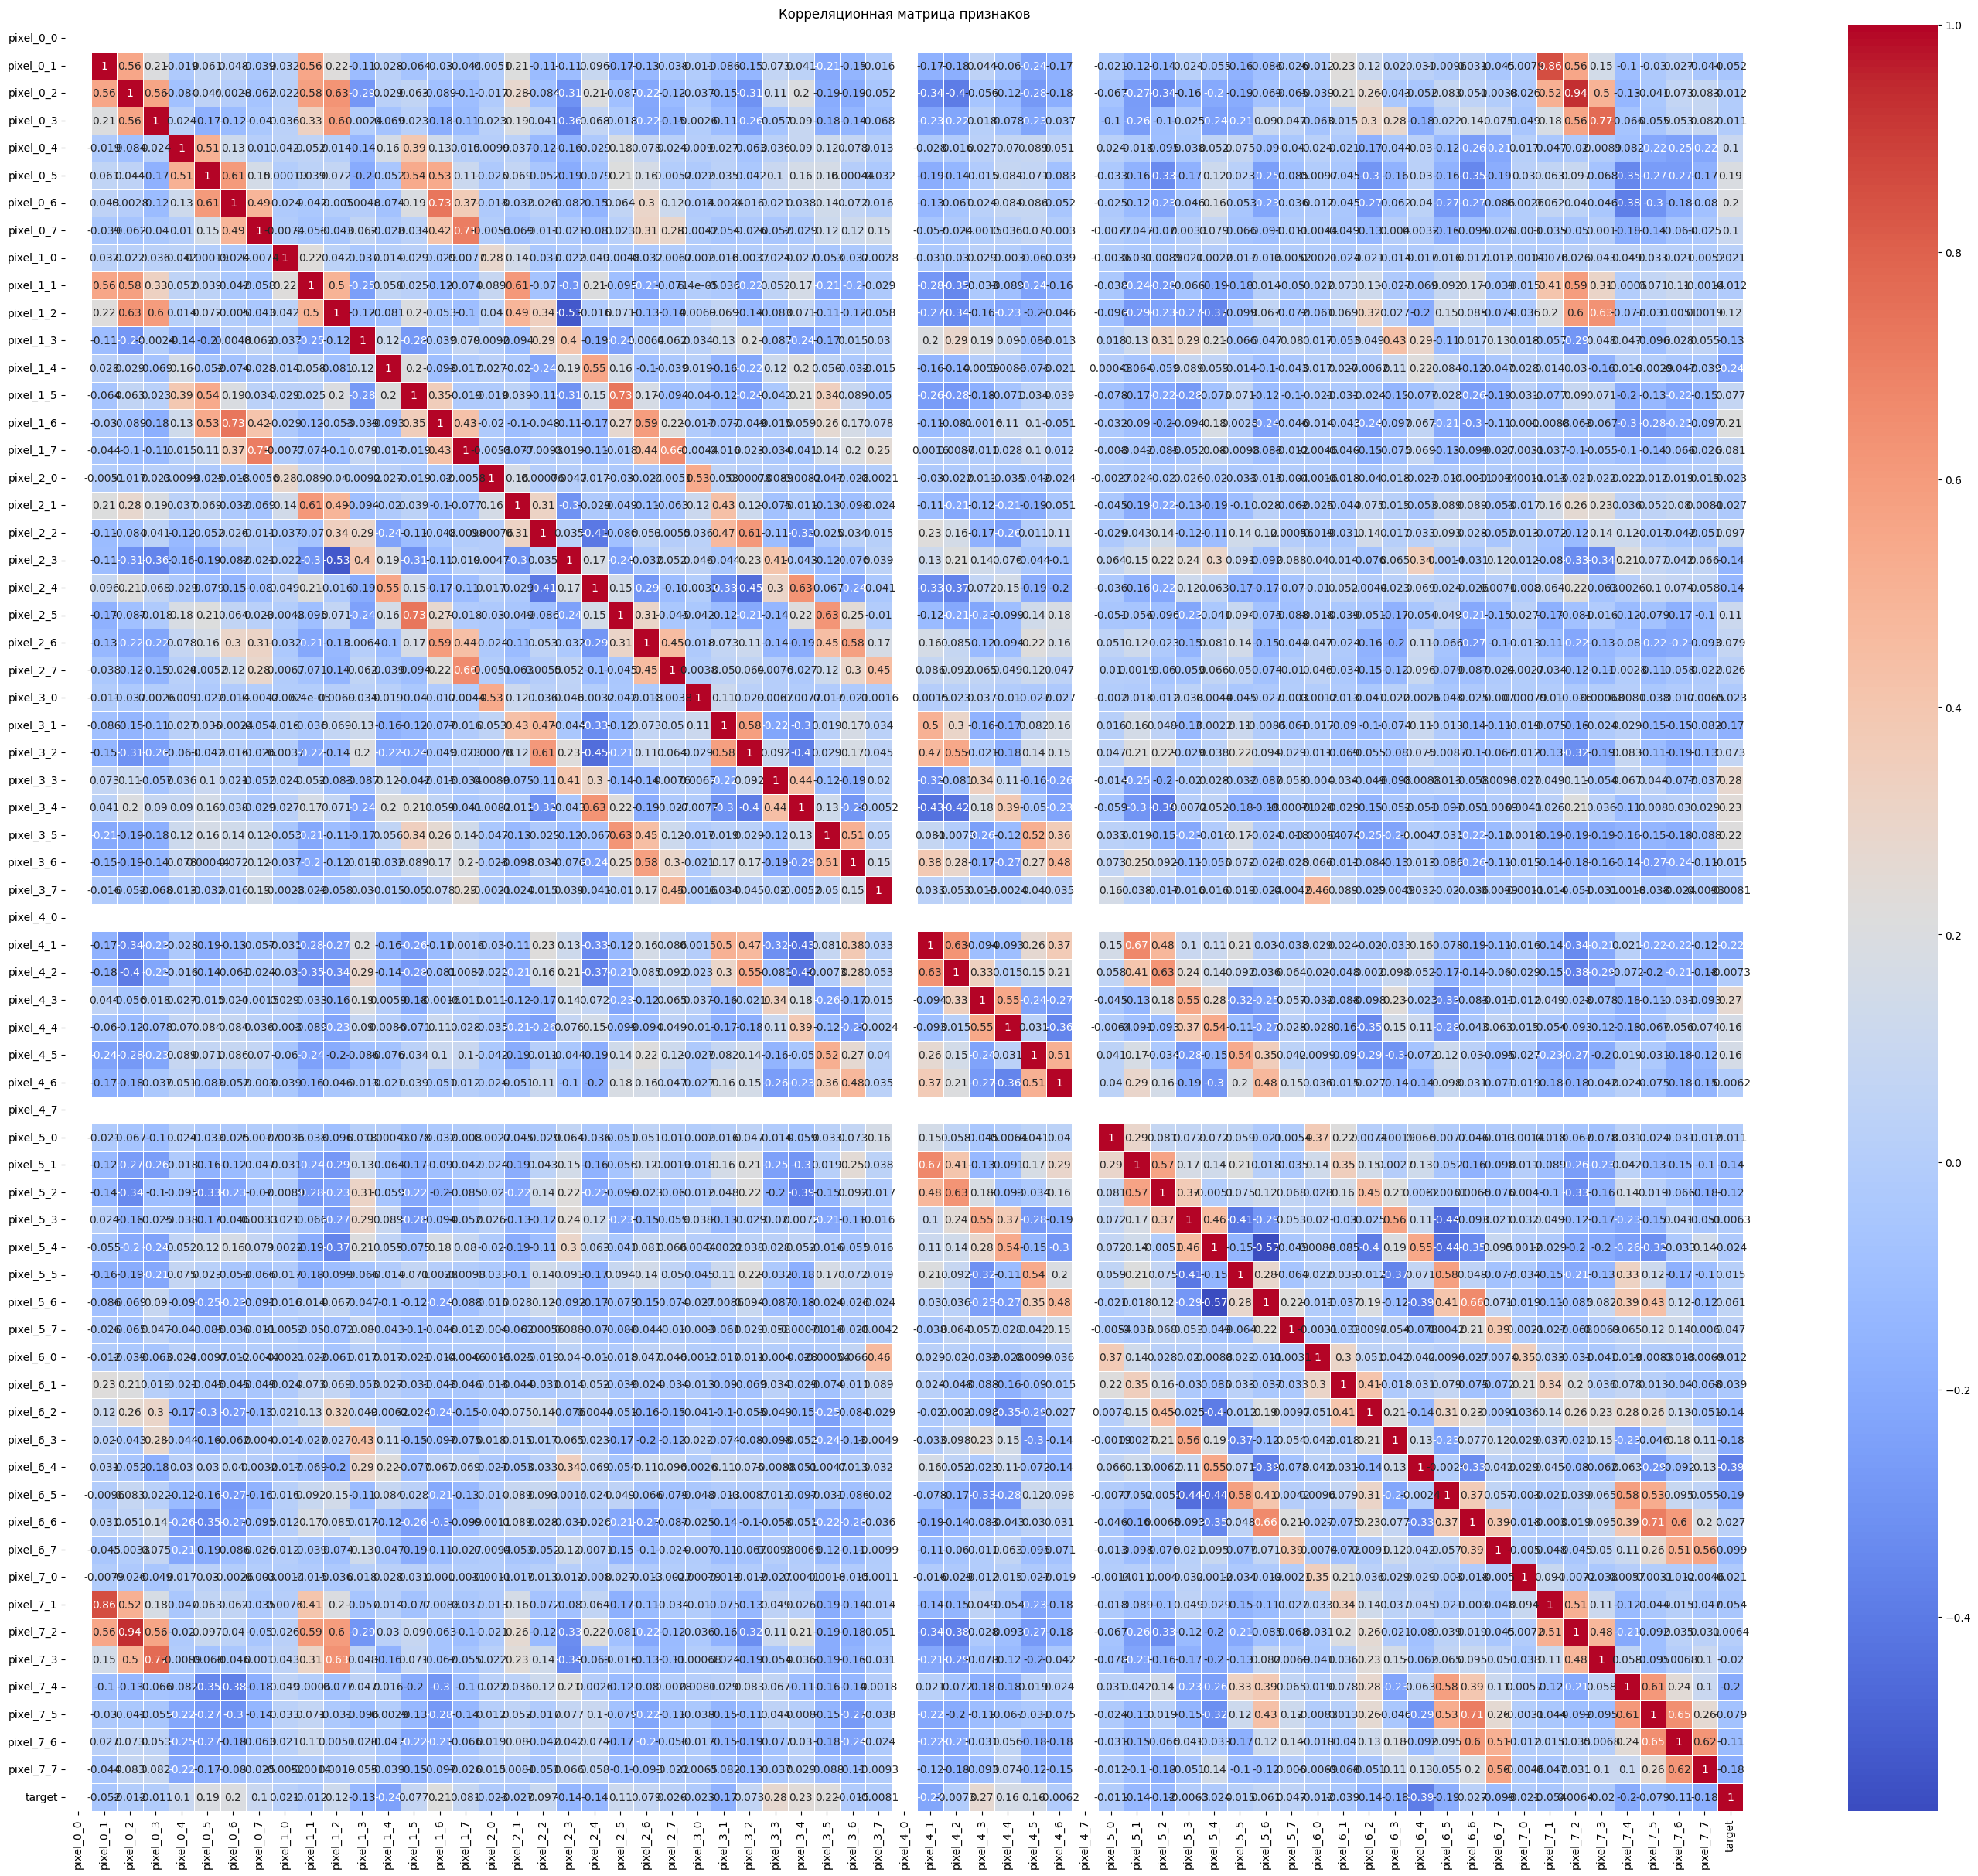

KeyError: 'target'

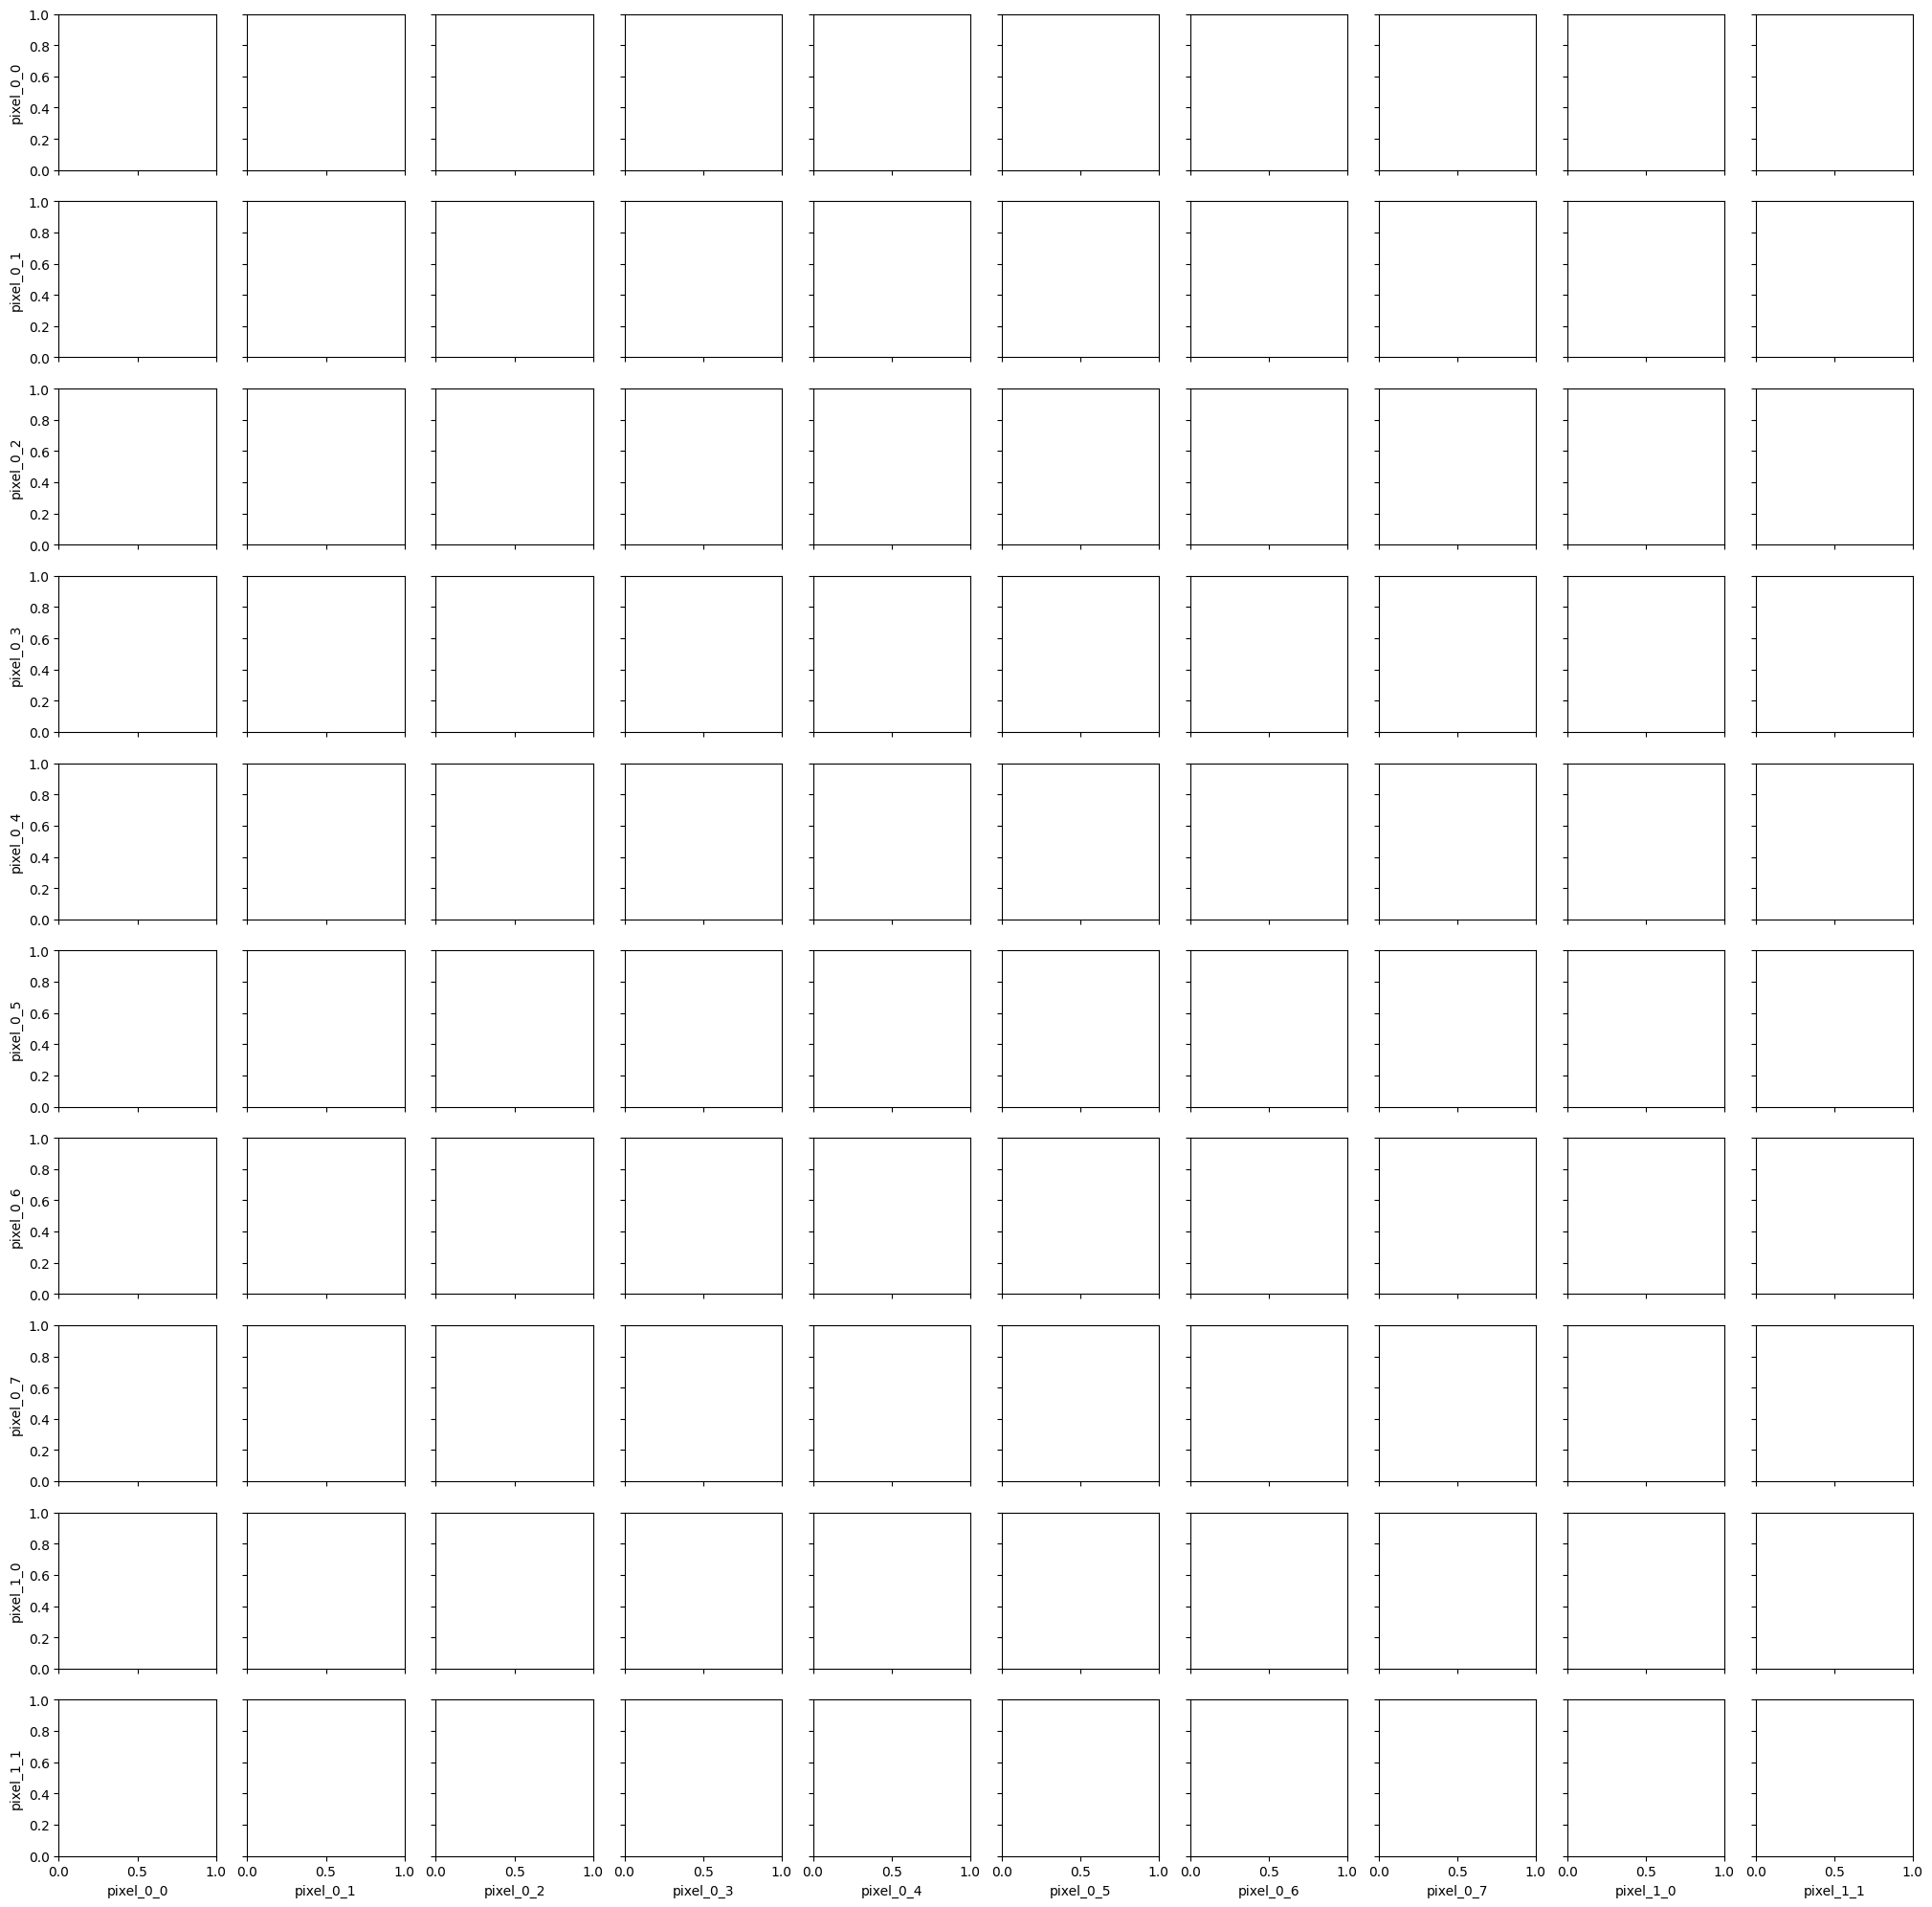

In [9]:
# Корреляционная матрица
corr_matrix = df.corr()
plt.figure(figsize=(35, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()
# Диаграммы рассеяния для нескольких признаков
sns.pairplot(df.iloc[:, :10], hue='target', palette='viridis')
plt.show()
#не получается визуализировать, выше я проверял добавлен ли target в датафрейм, но все равно почему-то ошибка


### 1.6 Выводы


*Сделать выводы по результатам предварительного визуального анализа исходных данных*

Средние значения признаков варьируются в диапазоне от 0 до 16, что соответствует интенсивности пикселей изображений.Дисперсия и стандартное отклонение показывают, что некоторые признаки имеют более широкое распределение значений, что может указывать на наличие выбросов.Данные сбалансированы по классам, каждый класс содержит примерно одинаковое количество образцов. Корреляционная матрица показывает, что некоторые признаки имеют высокую корреляцию друг с другом, что может указывать на избыточность данных.

---
# 2. Предобработка данных

### 2.1 Очистка данных


*а) Обнаружение и устранение дубликатов*\
*б) Обнаружение и устранение выбросов*\
*в) Устранение/восстановление пропущенных значений*

In [10]:
#проверка на дубликаты
duplicates = df.duplicated().sum()
print(f'Количество дубликатов: {duplicates}')

#удаление дубликатов
df = df.drop_duplicates()
print(f'Размер данных после удаления дубликатов: {df.shape}')

#Использование метода межквартильного диапазона для обнаружения выбросов
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#фильтрация данных
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
print(f'Размер данных после удаления выбросов: {df_cleaned.shape}')

#проверка на наличие пропущенных значений
missing_values = df.isnull().sum()
print(f'Пропущенные значения:\n{missing_values}')


df_filled = df.fillna(df.mean())
print(f'Размер данных после восстановления пропущенных значений: {df_filled.shape}')

Количество дубликатов: 0
Размер данных после удаления дубликатов: (1797, 65)
Размер данных после удаления выбросов: (489, 65)
Пропущенные значения:
pixel_0_0    0
pixel_0_1    0
pixel_0_2    0
pixel_0_3    0
pixel_0_4    0
            ..
pixel_7_4    0
pixel_7_5    0
pixel_7_6    0
pixel_7_7    0
target       0
Length: 65, dtype: int64
Размер данных после восстановления пропущенных значений: (1797, 65)


### 2.2 Разбиение данных на обучающую и тестовую выборки


*Разбить данные на обучающую и тестовую выборки в отношении 70/30*

In [11]:
from sklearn.model_selection import train_test_split
X = df_filled.drop('target', axis=1)
y = df_filled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f'обучающая: {X_train.shape}')
print(f'тестовая: {X_test.shape}')

обучающая: (1257, 64)
тестовая: (540, 64)


### 2.3 Преобразование данных

*Описать используемые способы преобразования входных и выходных переменных, привести обоснования выбранных способов преобразования, применить преобразования к обучающей и тестовой выборкам*

Применим нормализацию и масштабирование, так мы сможем привести их к одному масштабу.

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Нормализация признаков
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

print("Выполнено")

Выполнено


---
# 3. Построение и исследование модели машинного обучения

### 3.1 Обучение модели


*Выбрать модель и алгоритм машинного обучения для решения поставленной задачи, привести обоснование выбора, обучить модель на обучающей выборке*

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#обучаем
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

#делаем предсказания
y_pred = model.predict(X_test_scaled)

#оценка точности
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность модели логистической регрессии: {accuracy:.4f}")

Точность модели логистической регрессии: 0.9704


### 3.2 Оценка качества модели


**Для задач регрессии:**
* *построить диаграммы рассеяния в пространстве «выход модели – желаемый выход» на данных обучающей и тестовой выборок*
* *построить линейные регрессии выхода модели на желаемый выход*
* *рассчитать коэффициенты детерминации линейных регрессионных моделей для обучающей и тестовой выборок*
* *построить гистограммы распределения ошибок модели.*

**Для задач классификации:**
* *построить матрицы ошибок (confusion matrix) классификатора и рассчитать показатели качества классификации (чувствительность, специфичность, точность, F-мера, каппа Коэна) на обучающей и тестовой выборках.*

In [14]:
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
#матрицы ошибок
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

print('матрица ошибок для обучающей вырборки:\n', conf_matrix_train)
print('матрица ошибок для тестовой выборки:\n', conf_matrix_test)

матрица ошибок для обучающей вырборки:
 [[125   0   0   0   0   0   0   0   0   0]
 [  0 132   0   0   0   0   0   0   0   0]
 [  0   0 130   0   0   0   0   0   0   0]
 [  0   0   0 129   0   0   0   0   0   0]
 [  0   0   0   0 121   0   0   0   0   0]
 [  0   0   0   0   0 116   0   0   0   0]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   1   0   0   0   0   0   0 130   0]
 [  0   0   0   0   0   0   0   0   0 121]]
матрица ошибок для тестовой выборки:
 [[53  0  0  0  0  0  0  0  0  0]
 [ 0 47  2  0  0  0  0  0  1  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  1 50  0  1  0  0  2  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 63  1  0  0  2]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  0  0  0  0  1  0  0 42  0]
 [ 0  0  0  0  0  0  0  0  2 57]]


In [15]:
report_train = classification_report(y_train, y_train_pred)
kappa_train = cohen_kappa_score(y_train, y_train_pred)

print("показатели качества классификации для обучающей выборки:\n", report_train)
print(f"каппа Коэна для обучающей выборки: {kappa_train:.4f}")

report_test = classification_report(y_test, y_test_pred)
kappa_test = cohen_kappa_score(y_test, y_test_pred)

print("Показатели качества классификации для тестовой выборки:\n", report_test)
print(f"Каппа Коэна для тестовой выборки: {kappa_test:.4f}")

показатели качества классификации для обучающей выборки:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       125
           1       0.99      1.00      1.00       132
           2       1.00      1.00      1.00       130
           3       1.00      1.00      1.00       129
           4       1.00      1.00      1.00       121
           5       1.00      1.00      1.00       116
           6       1.00      1.00      1.00       128
           7       1.00      1.00      1.00       124
           8       1.00      0.99      1.00       131
           9       1.00      1.00      1.00       121

    accuracy                           1.00      1257
   macro avg       1.00      1.00      1.00      1257
weighted avg       1.00      1.00      1.00      1257

каппа Коэна для обучающей выборки: 0.9991
Показатели качества классификации для тестовой выборки:
               precision    recall  f1-score   support

           0       1.00      

### 3.3 Исследование модели и алгоритма обучения


*Провести экспериментальные исследования модели, построить графики зависимости ошибки модели от ее архитектурных параметров и гиперпараметров алгоритма обучения, построить ROC-кривые, оценить степень важности признаков и пр.*

Лучшие гиперпараметры: {'C': 0.3611590802176332, 'solver': 'newton-cg'}
Точность модели с лучшими гиперпараметрами: 0.9648


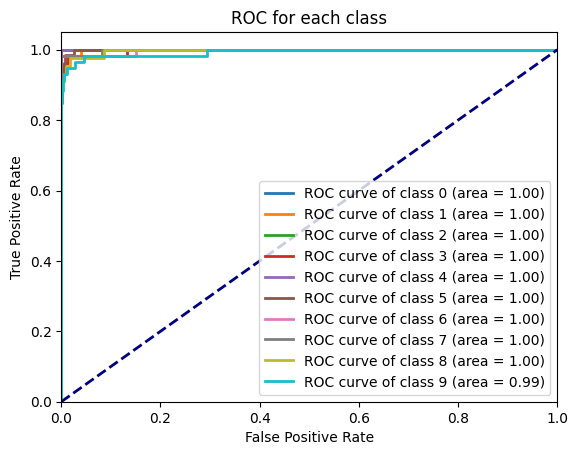

важность признаков:
pixel_5_2    0.699436
pixel_2_5    0.618719
pixel_1_5    0.506385
pixel_6_2    0.489563
pixel_4_2    0.437845
               ...   
pixel_5_4   -0.655072
pixel_2_4   -0.657565
pixel_5_3   -0.689927
pixel_3_4   -1.213144
pixel_4_4   -1.218293
Length: 64, dtype: float64


In [18]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from scipy.stats import uniform

#определение гиперпараметров
param_dist = {
    'C': uniform(loc=0, scale=4),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

#поиск лучших гиперпараметров
random_search = RandomizedSearchCV(LogisticRegression(max_iter=10000, random_state=42), param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train_scaled, y_train)

print(f"Лучшие гиперпараметры: {random_search.best_params_}")

#обучение модели с лучшими гиперпараметрами
best_model = random_search.best_estimator_
best_model = OneVsRestClassifier(best_model)
best_model.fit(X_train_scaled, y_train)

#предсказания и оценка точности
y_pred_best = best_model.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Точность модели с лучшими гиперпараметрами: {accuracy_best:.4f}")

#построение ROC кривой для каждого класса
y_prob = best_model.predict_proba(X_test_scaled)
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(data.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение всех ROC кривых
plt.figure()
for i in range(len(data.target_names)):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for each class')
plt.legend(loc="lower right")
plt.show()

# Оценка важности признаков
importance = best_model.estimators_[0].coef_[0]
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print(f"важность признаков:\n{feature_importance}")


### 3.4 Улучшение решения


*Предложить возможное улучшение точности решения задачи (выбрать другой тип модели, алгоритм или критерий обучения, сформулировать рекомендации по возможным способам повышения точности модели), обучить модель и сравнить показатели точности с рассчитанными в п.3.2*

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_train_pred_rf = rf_model.predict(X_train_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

conf_matrix_train_rf = confusion_matrix(y_train, y_train_pred_rf)
conf_matrix_test_rf = confusion_matrix(y_test, y_test_pred_rf)

print('Матрица ошибок для обучающей выборки (Random Forest):\n', conf_matrix_train_rf)
print('Матрица ошибок для тестовой выборки (Random Forest):\n', conf_matrix_test_rf)

report_train_rf = classification_report(y_train, y_train_pred_rf)
kappa_train_rf = cohen_kappa_score(y_train, y_train_pred_rf)

print("Показатели качества классификации для обучающей выборки (Random Forest):\n", report_train_rf)
print(f"Каппа Коэна для обучающей выборки (Random Forest): {kappa_train_rf:.4f}")

report_test_rf = classification_report(y_test, y_test_pred_rf)
kappa_test_rf = cohen_kappa_score(y_test, y_test_pred_rf)

print("Показатели качества классификации для тестовой выборки (Random Forest):\n", report_test_rf)
print(f"Каппа Коэна для тестовой выборки (Random Forest): {kappa_test_rf:.4f}")

Матрица ошибок для обучающей выборки (Random Forest):
 [[125   0   0   0   0   0   0   0   0   0]
 [  0 132   0   0   0   0   0   0   0   0]
 [  0   0 130   0   0   0   0   0   0   0]
 [  0   0   0 129   0   0   0   0   0   0]
 [  0   0   0   0 121   0   0   0   0   0]
 [  0   0   0   0   0 116   0   0   0   0]
 [  0   0   0   0   0   0 128   0   0   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   0   0   0   0   0   0   0 131   0]
 [  0   0   0   0   0   0   0   0   0 121]]
Матрица ошибок для тестовой выборки (Random Forest):
 [[52  0  0  0  1  0  0  0  0  0]
 [ 0 49  1  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  2  0  0  0  0  0  0 41  0]
 [ 0  0  0  1  0  1  0  1  0 56]]
Показатели качества классификации для обучающей выборки (Random Forest):
               precision    recall  f1-score   support



Random Forest показывает себя чуть лучше на тестовой выборке, возможно стоит выбирать его для аналогичных задач.

В целом оба алгоритма хорошо себя показывают с точностью 1.00. Каппа Коэна для Random Forest(1.0000) выше чем логистическая регрессия(0,9991), что указывает на чуть лучшую согласованность.

Что касается тестовой выборки, то точность одинакова(0,97).Каппа Коэна для Random Forest(0,9712) снова чуть выше чем для логистической регрессии(0,9670).

### 3.5 Выводы


описал выше


TODO